In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [6]:
Y_train

array([4, 2, 3, ..., 7, 8, 8])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration:  0
[5 5 5 ... 3 2 8] [4 2 3 ... 7 8 8]
Accuracy:  0.1292439024390244
Iteration:  10
[5 2 4 ... 5 2 5] [4 2 3 ... 7 8 8]
Accuracy:  0.20073170731707318
Iteration:  20
[5 2 4 ... 8 2 5] [4 2 3 ... 7 8 8]
Accuracy:  0.25158536585365854
Iteration:  30
[8 2 3 ... 8 2 5] [4 2 3 ... 7 8 8]
Accuracy:  0.293390243902439
Iteration:  40
[8 2 3 ... 8 2 8] [4 2 3 ... 7 8 8]
Accuracy:  0.3483414634146341
Iteration:  50
[4 2 3 ... 4 1 4] [4 2 3 ... 7 8 8]
Accuracy:  0.413
Iteration:  60
[4 6 3 ... 4 1 4] [4 2 3 ... 7 8 8]
Accuracy:  0.468780487804878
Iteration:  70
[4 6 3 ... 4 1 8] [4 2 3 ... 7 8 8]
Accuracy:  0.5101951219512195
Iteration:  80
[4 2 3 ... 4 1 8] [4 2 3 ... 7 8 8]
Accuracy:  0.546219512195122
Iteration:  90
[4 2 3 ... 4 1 8] [4 2 3 ... 7 8 8]
Accuracy:  0.5833170731707317
Iteration:  100
[4 2 3 ... 4 1 8] [4 2 3 ... 7 8 8]
Accuracy:  0.6141707317073171
Iteration:  110
[4 2 3 ... 4 1 8] [4 2 3 ... 7 8 8]
Accuracy:  0.6401463414634146
Iteration:  120
[4 2 3 ... 9 1 8] [4 2 3 

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


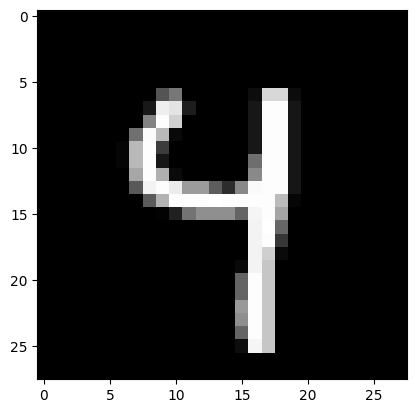

Prediction:  [2]
Label:  2


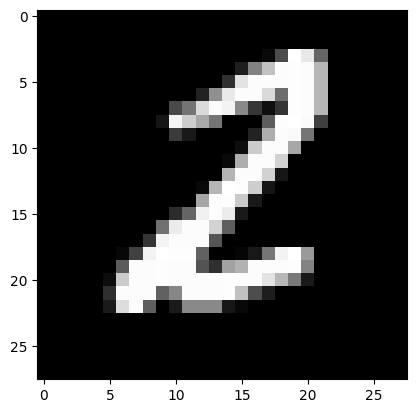

Prediction:  [3]
Label:  3


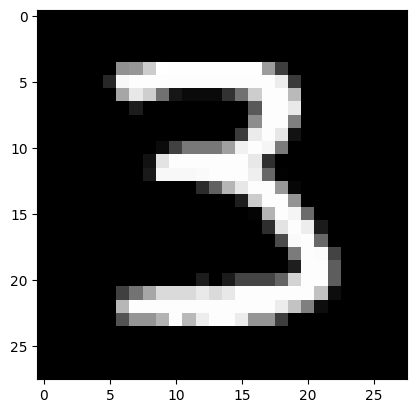

Prediction:  [1]
Label:  7


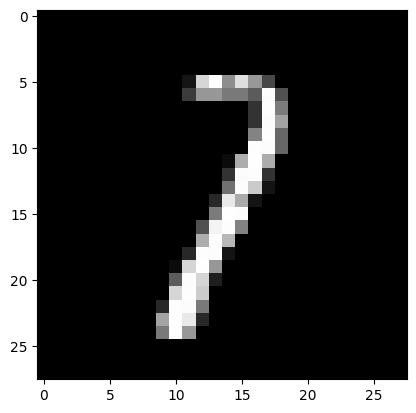

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 0 7 7 2 9 5 9 0 5 4 3 7 8 4 5 7 3 1 2 3 8 0 6 3 4 4 6 5 7 5 9 4 3 1 9 8
 3 7 2 0 0 3 2 0 2 2 4 8 5 6 1 6 1 6 7 1 8 1 0 4 3 9 7 6 9 4 3 1 5 8 7 8 7
 4 6 0 6 3 4 9 7 5 8 0 2 1 5 2 9 0 7 4 1 2 0 0 8 4 9 9 5 4 5 6 0 1 7 3 6 2
 7 5 7 5 3 2 9 0 8 4 5 7 2 2 9 1 0 4 1 7 4 0 6 2 0 6 0 2 2 1 9 9 9 6 0 3 0
 6 5 6 0 5 3 3 7 2 1 3 2 7 2 5 2 5 4 8 6 7 7 5 7 1 3 1 1 9 4 0 5 3 8 2 1 1
 4 8 5 1 5 3 9 5 3 0 1 4 2 3 2 6 7 5 1 5 1 2 4 4 6 7 3 5 2 0 9 6 6 5 2 0 4
 9 3 6 0 2 4 1 6 7 5 6 2 9 9 2 6 9 9 5 8 6 3 0 9 9 7 9 7 0 1 6 5 3 5 1 8 6
 2 3 4 2 6 7 7 3 3 4 6 3 9 6 7 4 7 2 4 1 0 4 9 4 6 7 0 3 2 1 1 7 1 4 4 0 1
 7 0 0 9 6 4 9 2 0 3 3 2 0 9 8 7 6 7 2 5 8 8 4 5 2 8 3 6 1 7 0 1 8 5 7 1 0
 5 9 7 2 2 1 0 1 9 7 1 6 5 0 8 1 9 1 6 7 5 9 0 0 9 4 4 8 6 5 2 0 9 1 8 2 4
 6 9 3 6 8 0 6 2 2 9 7 4 1 0 8 2 4 4 0 8 3 7 3 2 1 8 2 1 3 1 1 3 2 3 2 8 7
 8 9 7 1 4 8 7 2 2 4 8 8 5 5 6 8 8 7 2 6 8 4 5 0 0 2 6 5 9 6 3 8 7 4 3 8 2
 4 6 9 3 8 1 8 6 2 6 4 9 0 5 6 3 6 3 4 3 0 7 4 6 9 8 5 3 3 4 4 5 8 5 2 8 3
 5 4 6 0 8 2 8 5 8 8 0 8 

0.885